In [39]:
import pandas as pd
import altair as alt
import altair_latimes as lat

In [40]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [41]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [42]:
pitches = pd.read_csv("./input/sliders.csv")

In [43]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 89 columns):
pitch_type                         40000 non-null object
game_date                          40000 non-null object
release_speed                      39999 non-null float64
release_pos_x                      39999 non-null float64
release_pos_z                      39999 non-null float64
player_name                        40000 non-null object
batter                             40000 non-null int64
pitcher                            40000 non-null int64
events                             10528 non-null object
description                        40000 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               39999 non-null float64
des                                10528 non-n

In [44]:
pitches['date'] = pd.to_datetime(pitches['game_date'])

In [45]:
pitches['season'] = pitches['date'].dt.year

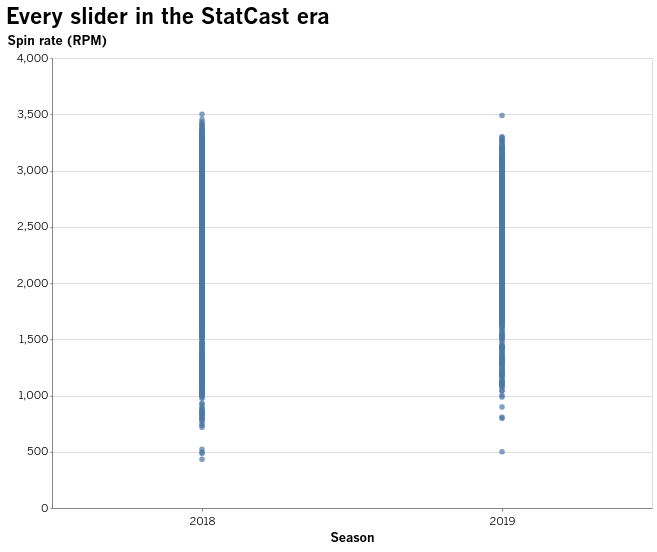

In [47]:
alt.Chart(pitches).mark_circle().encode(
    x=alt.X(
        "season:O",
        title="Season",
    ),
    y=alt.Y(
        "release_spin_rate:Q",
        title="Spin rate (RPM)",
        scale=alt.Scale(zero=False)
    ),
).properties(
    title="Every slider in the StatCast era",
    width=600,
)

In [13]:
pitcher_stats = pitches.groupby("player_name").agg(dict(
    player_name="size",
    release_speed="median",
    release_spin_rate="median"
)).rename(columns={"player_name": "pitch_count"})

In [15]:
qualified_pitchers = pitcher_stats[pitcher_stats.pitch_count > 100].reset_index()

In [17]:
qualified_pitchers.sort_values("release_speed", ascending=False).head()

,player_name,pitch_count,release_speed,release_spin_rate
51,Jacob deGrom,261,91.9,2506.0
149,Zack Wheeler,156,91.6,2359.5
103,Noah Syndergaard,229,91.6,2086.0
92,Michael Lorenzen,134,91.4,2561.0
53,Jake Arrieta,229,90.0,2448.5


In [18]:
qualified_pitchers.sort_values("release_spin_rate", ascending=False).head()

,player_name,pitch_count,release_speed,release_spin_rate
93,Miguel Castro,131,84.4,2967.0
0,Adam Morgan,119,80.3,2908.0
140,Walker Buehler,118,85.1,2877.0
28,Collin McHugh,161,79.1,2869.0
23,Chaz Roe,186,80.6,2862.5


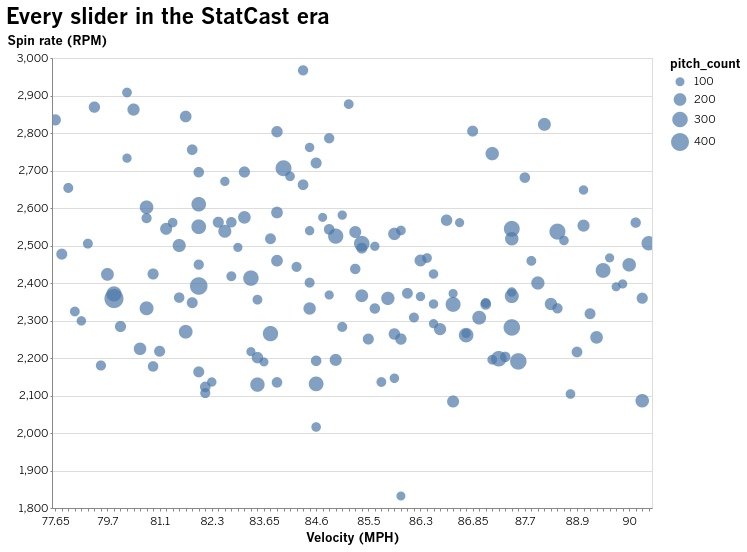

In [35]:
alt.Chart(qualified_pitchers).mark_circle(clip=True).encode(
    x=alt.X(
        "release_speed:O",
        title="Velocity (MPH)",
    ),
    y=alt.Y(
        "release_spin_rate:Q",
        title="Spin rate (RPM)",
        scale=alt.Scale(zero=False)
    ),
    size="pitch_count",
    tooltip=["player_name", "pitch_count", "release_speed", "release_spin_rate"]
).properties(
    title="Every slider in the StatCast era",
    width=600,
)